In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [12]:
df=pd.read_csv('Amazon Sale Report.csv')

In [13]:
df.shape

(128976, 21)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [15]:
df.describe()

index            Qty         Amount  ship-postal-code  New  \
count  128976.000000  128976.000000  121176.000000     128941.000000  0.0   
mean    64486.130427       0.904401     648.562176     463945.677744  NaN   
std     37232.897832       0.313368     281.185041     191458.488954  NaN   
min         0.000000       0.000000       0.000000     110001.000000  NaN   
25%     32242.750000       1.000000     449.000000     382421.000000  NaN   
50%     64486.500000       1.000000     605.000000     500033.000000  NaN   
75%     96730.250000       1.000000     788.000000     600024.000000  NaN   
max    128974.000000      15.000000    5584.000000     989898.000000  NaN   

       PendingS  
count       0.0  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

In [16]:
df.head(10)

index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   
5      5  404-1490984-4578765  04-30-22                       Shipped   
6      6  408-5748499-6859555  04-30-22                       Shipped   
7      7  406-7807733-3785945  04-30-22  Shipped - Delivered to Buyer   
8      8  407-5443024-5233168  04-30-22                     Cancelled   
9      9  402-4393761-0311520  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   
5     Amazon     Amazon.in          Expedited   T-shirt   XL        Shipped   
6     Amazon     Amazon.in          Expedited   T-shirt    L        Shipped   
7   Merchant     Amazon.in           Standard     Shirt    S        Shipped   
8     Amazon     Amazon.in          Expedited   T-shirt  3XL      Cancelled   
9     Amazon     Amazon.in          Expedited     Shirt  XXL        Shipped   

   ...  currency  Amount    ship-city     ship-state ship-postal-code  \
0  ...       INR  647.62       MUMBAI    MAHARASHTRA         400081.0   
1  ...       INR  406.00    BENGALURU      KARNATAKA         560085.0   
2  ...       INR  329.00  NAVI MUMBAI    MAHARASHTRA         410210.0   
3  ...       INR  753.33   PUDUCHERRY     PUDUCHERRY         605008.0   
4  ...       INR  574.00      CHENNAI     TAMIL NADU         600073.0   
5  ...       INR  824.00    GHAZIABAD  UTTAR PRADESH         201102.0   
6  ...       INR  653.00   CHANDIGARH     CHANDIGARH         160036.0   
7  ...       INR  399.00    HYDERABAD      TELANGANA         500032.0   
8  ...       NaN     NaN    HYDERABAD      TELANGANA         500008.0   
9  ...       INR  363.00      Chennai     TAMIL NADU         600041.0   

   ship-country    B2B  fulfilled-by New  PendingS  
0            IN  False     Easy Ship NaN       NaN  
1            IN  False     Easy Ship NaN       NaN  
2            IN   True           NaN NaN       NaN  
3            IN  False     Easy Ship NaN       NaN  
4            IN  False           NaN NaN       NaN  
5            IN  False           NaN NaN       NaN  
6            IN  False           NaN NaN       NaN  
7            IN  False     Easy Ship NaN       NaN  
8            IN  False           NaN NaN       NaN  
9            IN  False           NaN NaN       NaN  

[10 rows x 21 columns]

In [18]:
df.tail(10)

index             Order ID      Date     Status Fulfilment  \
128966  128965  408-5154281-4593912  05-31-22  Cancelled     Amazon   
128967  128966  406-9812666-2474761  05-31-22    Shipped     Amazon   
128968  128967  404-5182288-1653947  05-31-22  Cancelled     Amazon   
128969  128968  403-7059995-7618722  05-31-22    Shipped     Amazon   
128970  128969  404-3802633-7250760  05-31-22  Cancelled     Amazon   
128971  128970  406-6001380-7673107  05-31-22    Shipped     Amazon   
128972  128971  402-9551604-7544318  05-31-22    Shipped     Amazon   
128973  128972  407-9547469-3152358  05-31-22    Shipped     Amazon   
128974  128973  402-6184140-0545956  05-31-22    Shipped     Amazon   
128975  128974  408-7436540-8728312  05-31-22    Shipped     Amazon   

       Sales Channel ship-service-level  Category Size Courier Status  ...  \
128966     Amazon.in          Expedited  Trousers  3XL      Unshipped  ...   
128967     Amazon.in          Expedited   T-shirt   XS        Shipped  ...   
128968     Amazon.in          Expedited     Shirt   XS      Cancelled  ...   
128969     Amazon.in          Expedited   T-shirt   XL        Shipped  ...   
128970     Amazon.in          Expedited   T-shirt    M      Unshipped  ...   
128971     Amazon.in          Expedited     Shirt   XL        Shipped  ...   
128972     Amazon.in          Expedited   T-shirt    M        Shipped  ...   
128973     Amazon.in          Expedited   Blazzer  XXL        Shipped  ...   
128974     Amazon.in          Expedited   T-shirt   XS        Shipped  ...   
128975     Amazon.in          Expedited   T-shirt    S        Shipped  ...   

        currency  Amount              ship-city     ship-state  \
128966       INR   574.0  Prayagraj (ALLAHABAD)  UTTAR PRADESH   
128967       INR  1132.0         CHENNAI 600042     TAMIL NADU   
128968       NaN     NaN                Kolkata    WEST BENGAL   
128969       INR   824.0                  Delhi          DELHI   
128970       INR   612.0                 MUMBAI    MAHARASHTRA   
128971       INR   517.0              HYDERABAD      TELANGANA   
128972       INR   999.0               GURUGRAM        HARYANA   
128973       INR   690.0              HYDERABAD      TELANGANA   
128974       INR  1199.0                  Halol        Gujarat   
128975       INR   696.0                 Raipur   CHHATTISGARH   

       ship-postal-code  ship-country    B2B  fulfilled-by New  PendingS  
128966         211007.0            IN  False           NaN NaN       NaN  
128967         600042.0            IN  False           NaN NaN       NaN  
128968         700040.0            IN  False           NaN NaN       NaN  
128969         110053.0            IN  False           NaN NaN       NaN  
128970         400017.0            IN  False           NaN NaN       NaN  
128971         500013.0            IN  False           NaN NaN       NaN  
128972         122004.0            IN  False           NaN NaN       NaN  
128973         500049.0            IN  False           NaN NaN       NaN  
128974         389350.0            IN  False           NaN NaN       NaN  
128975         492014.0            IN  False           NaN NaN       NaN  

[10 rows x 21 columns]

In [19]:
df['New'].isnull().sum()

128976

In [23]:
df['PendingS'].isnull().sum()

128976

In [24]:
# This 2 columns are empty , so drop it
df.drop(['New','PendingS'],axis=1,inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [30]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [28]:
df.shape

(128976, 19)

In [31]:
df.dropna(inplace=True)

In [32]:
df.shape

(37514, 19)

In [33]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37514 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               37514 non-null  int64  
 1   Order ID            37514 non-null  object 
 2   Date                37514 non-null  object 
 3   Status              37514 non-null  object 
 4   Fulfilment          37514 non-null  object 
 5   Sales Channel       37514 non-null  object 
 6   ship-service-level  37514 non-null  object 
 7   Category            37514 non-null  object 
 8   Size                37514 non-null  object 
 9   Courier Status      37514 non-null  object 
 10  Qty                 37514 non-null  int64  
 11  currency            37514 non-null  object 
 12  Amount              37514 non-null  float64
 13  ship-city           37514 non-null  object 
 14  ship-state          37514 non-null  object 
 15  ship-postal-code    37514 non-null  float64
 16  shi

In [35]:
df['ship-postal-code']=df['ship-postal-code'].astype('int')

In [36]:
df['Date']=pd.to_datetime(df['Date'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37514 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               37514 non-null  int64         
 1   Order ID            37514 non-null  object        
 2   Date                37514 non-null  datetime64[ns]
 3   Status              37514 non-null  object        
 4   Fulfilment          37514 non-null  object        
 5   Sales Channel       37514 non-null  object        
 6   ship-service-level  37514 non-null  object        
 7   Category            37514 non-null  object        
 8   Size                37514 non-null  object        
 9   Courier Status      37514 non-null  object        
 10  Qty                 37514 non-null  int64         
 11  currency            37514 non-null  object        
 12  Amount              37514 non-null  float64       
 13  ship-city           37514 non-null  object   

In [58]:
df.rename(columns={'Qty':'Quantity'},inplace=True)

In [59]:
df.describe(include='object')

Order ID                        Status Fulfilment  \
count                 37514                         37514      37514   
unique                34664                            11          1   
top     171-5057375-2831560  Shipped - Delivered to Buyer   Merchant   
freq                     12                         28741      37514   

       Sales Channel ship-service-level Category   Size Courier Status  \
count          37514              37514    37514  37514          37514   
unique             1                  1        8     11              3   
top        Amazon.in           Standard  T-shirt      M        Shipped   
freq           37514              37514    14062   6806          31859   

       currency  ship-city   ship-state ship-country fulfilled-by  
count     37514      37514        37514        37514        37514  
unique        1       4698           58            1            1  
top         INR  BENGALURU  MAHARASHTRA           IN    Easy Ship  
freq      37514       2839         6236        37514        37514

In [60]:
df['Order ID'].describe()  #df[['Order ID','Size']].describe()

count                   37514
unique                  34664
top       171-5057375-2831560
freq                       12
Name: Order ID, dtype: object

# Exploratory Data Analysis

## Size

<ipython-input-61-a421f9d0ac21>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.countplot(data=df,x='Size',palette='tab10',order=df['Size'].value_counts().index)


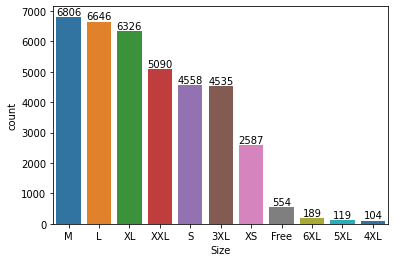

In [61]:
a=sns.countplot(data=df,x='Size',palette='tab10',order=df['Size'].value_counts().index)
for i in a.containers:
    a.bar_label(i)

### NOTE: From above graph we can see that most of the people buy M-size

<ipython-input-68-1d4ff6b68890>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sale_qua,x='Size',y='Quantity',palette='Dark2')


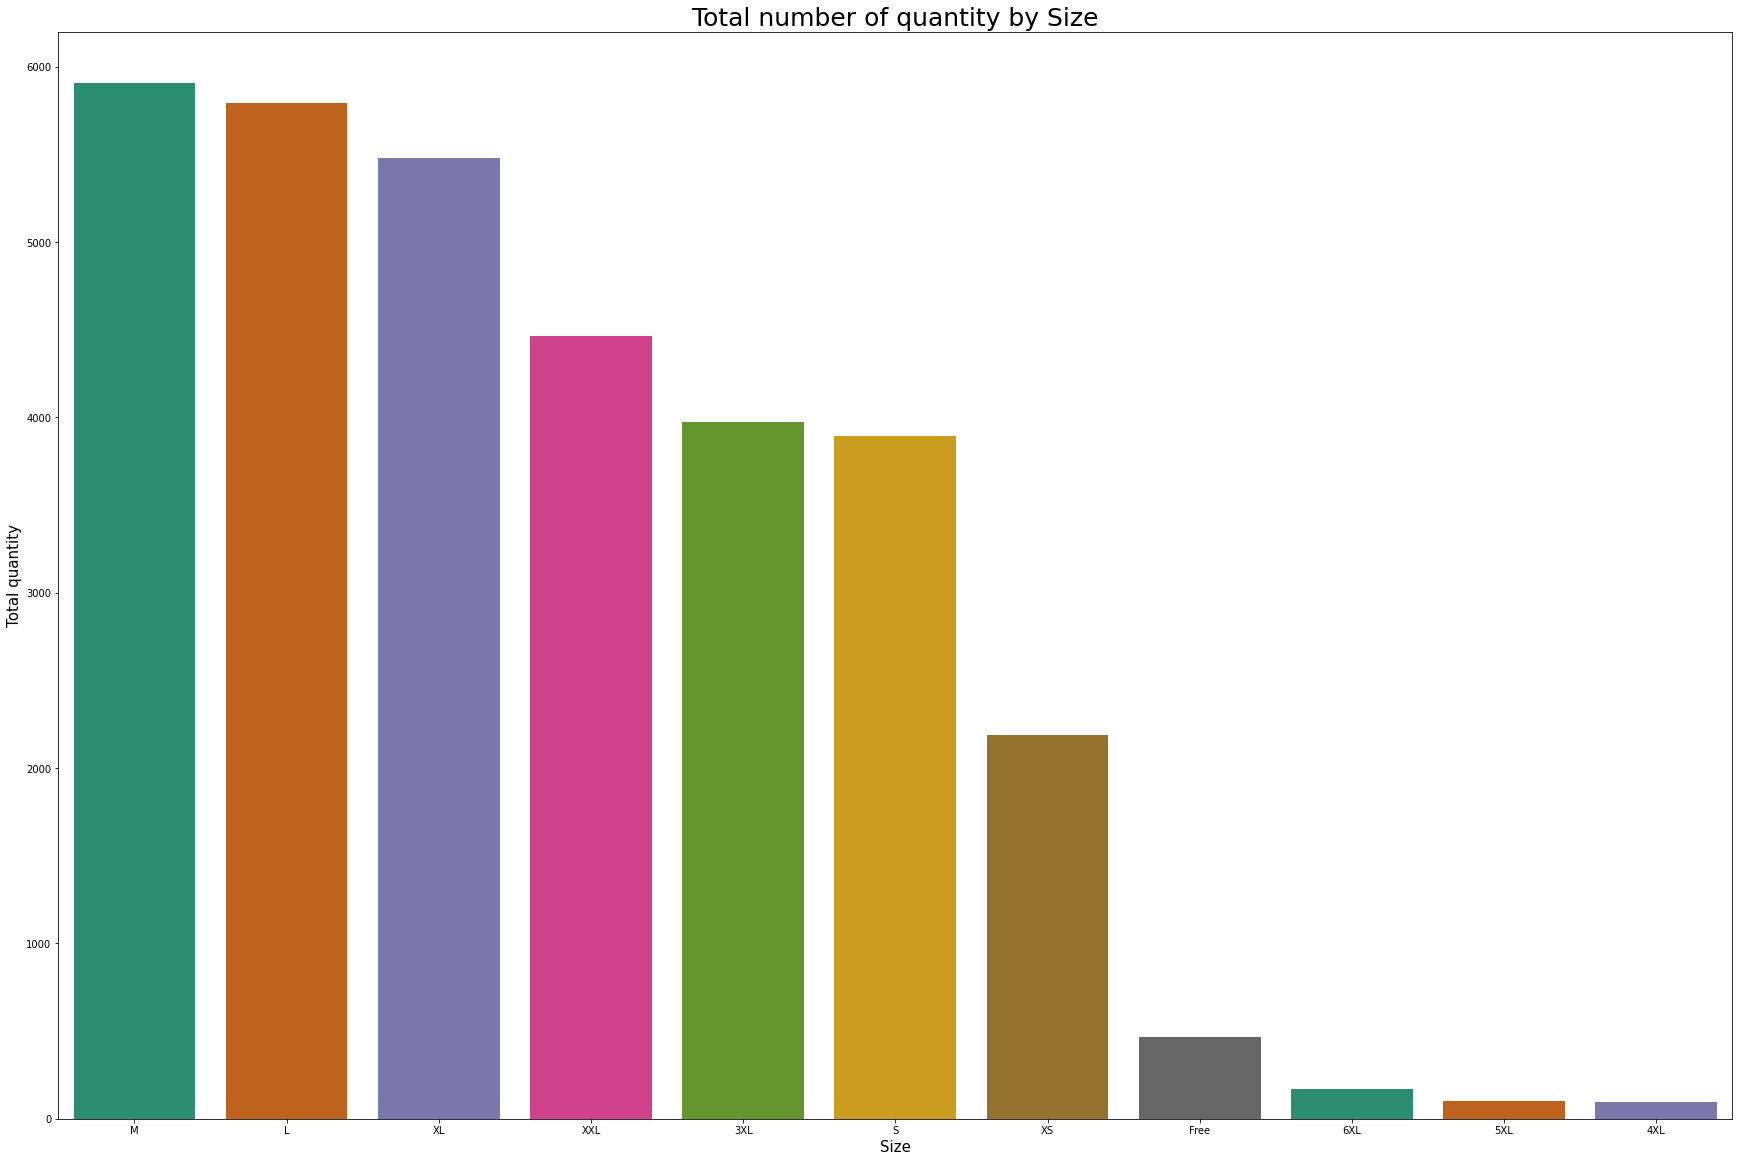

In [68]:
sale_qua=df.groupby('Size',as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False)
plt.figure(figsize=(30,20))
sns.barplot(data=sale_qua,x='Size',y='Quantity',palette='Dark2')
plt.title('Total number of quantity by Size',fontsize=25)
plt.xlabel('Size',fontsize=15)
plt.ylabel('Total quantity',fontsize=15)
plt.show()

### Frome above graph we can see that most of the quantity buy is M-size

# Courier Status

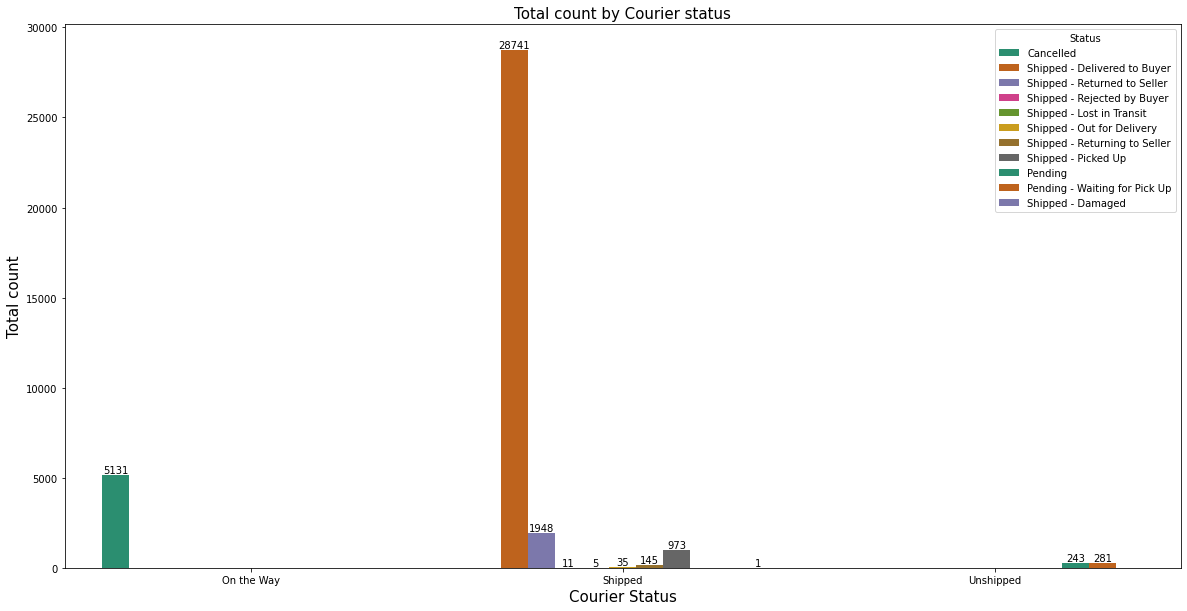

In [96]:
plt.figure(figsize=(20,10))
plt.title('Total count by Courier status',fontsize=15)
plt.xlabel('Courier Status',fontsize=15)
plt.ylabel('Total count',fontsize=15)
a=sns.countplot(data=df,x='Courier Status',hue='Status',palette='Dark2')
for i in a.containers:
    a.bar_label(i)

plt.show()

### from above graph the majority of orders are shipped through courier

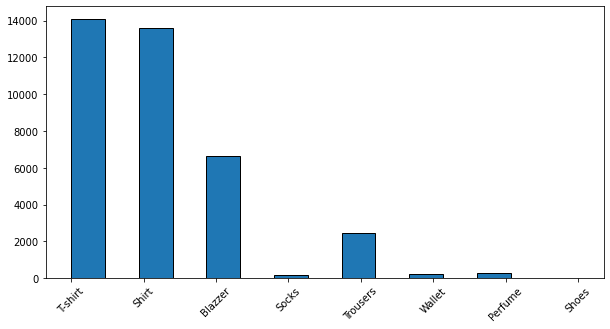

In [114]:
df['Category']=df['Category'].astype('str')
plt.figure(figsize=(10,5))


plt.hist(x=df['Category'],bins=15,edgecolor='Black')
plt.xticks(rotation=45)
plt.show()

### From above graph we can see that most of the category buy is T-shirt 

# B2B

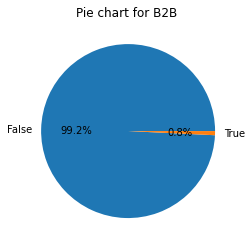

In [132]:
b2b=df['B2B'].value_counts()
plt.pie(b2b,labels=b2b.index,autopct='%1.1f%%')
plt.title("Pie chart for B2B ")
plt.show()

### from above graph we can see that 99.2% of buyers are retailers & 0.8% are B2B buyers.

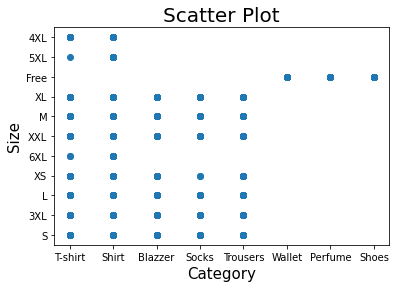

In [138]:
x=df['Category']
y=df['Size']
plt.scatter(x,y)
plt.xlabel('Category',fontsize=15)
plt.ylabel('Size',fontsize=15)
plt.title('Scatter Plot',fontsize=20)
plt.show()

### from this we are able to see that which category have whice type of size 

<ipython-input-167-a3e8c13076c7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.countplot(data=b,x='ship-state',palette='Dark2')


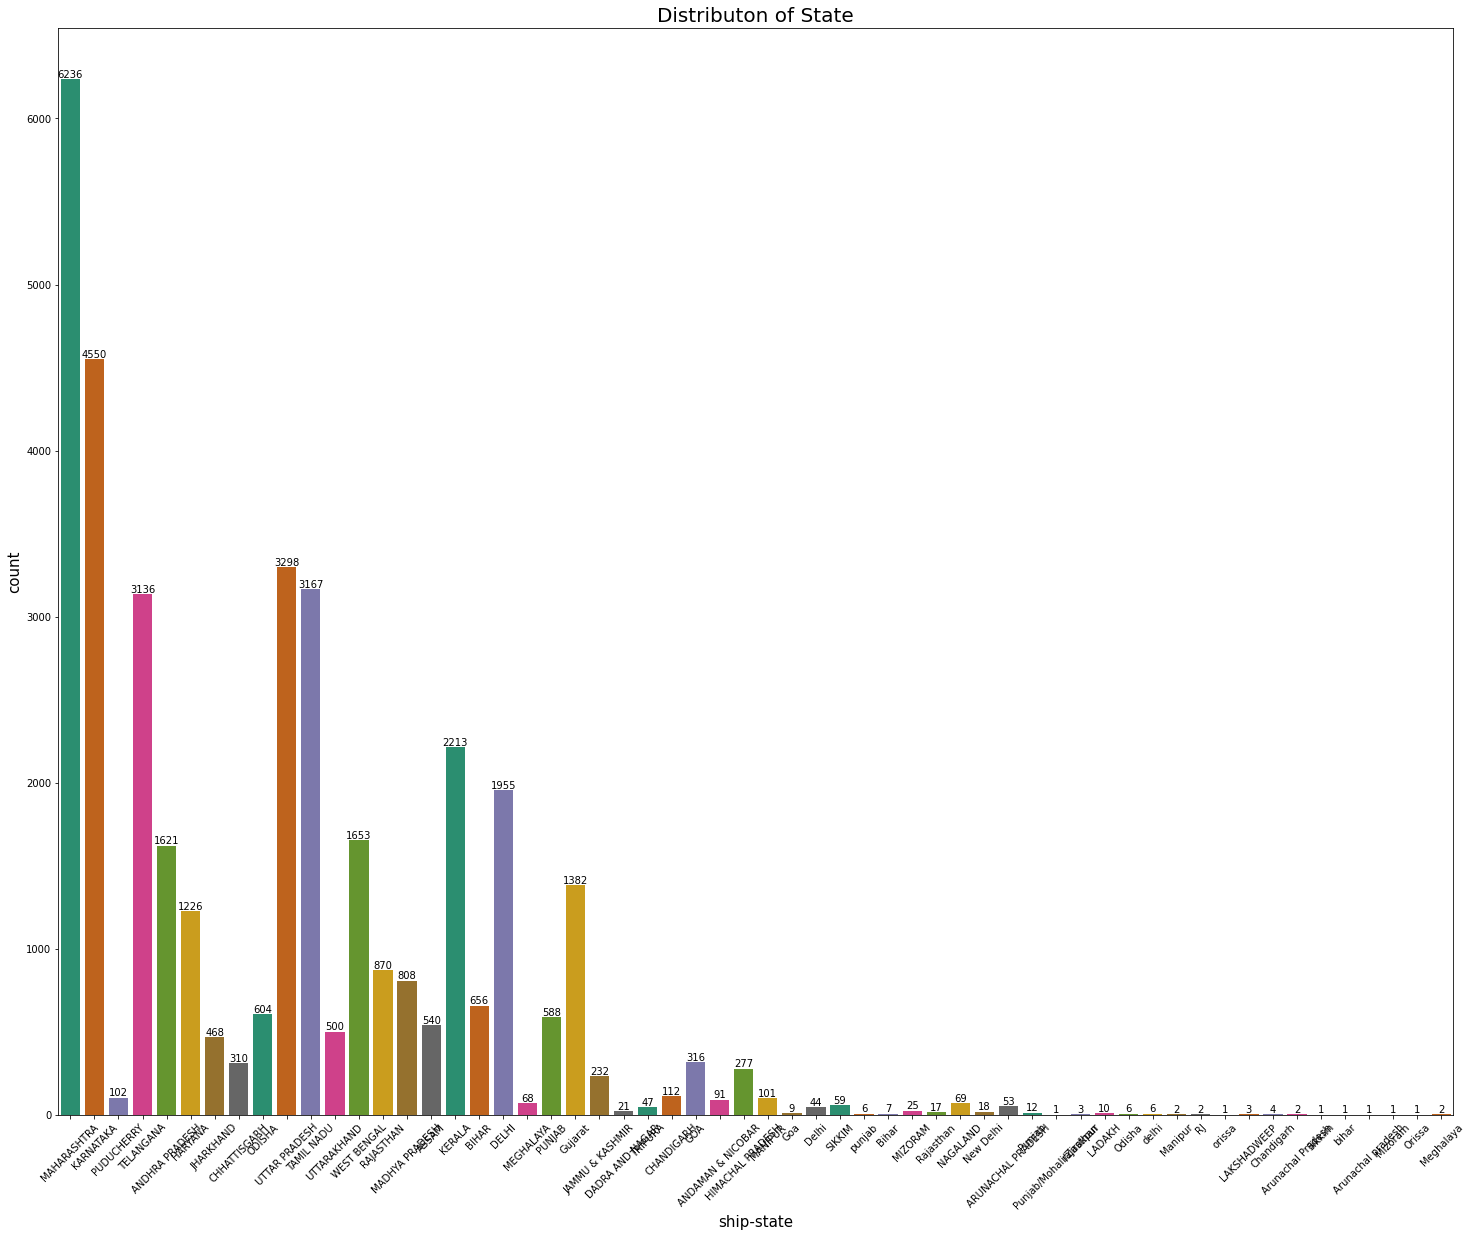

In [167]:
plt.figure(figsize=(25,20))
b=df
a=sns.countplot(data=b,x='ship-state',palette='Dark2')
for i in a.containers:
    a.bar_label(i)
plt.xlabel('ship-state',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('Distributon of State',fontsize=20)
plt.xticks(rotation=45)
plt.show()

<ipython-input-166-3cae804dfab8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.countplot(data=df[df['ship-state'].isin(value_counts.index)],x='ship-state',palette='Dark2')


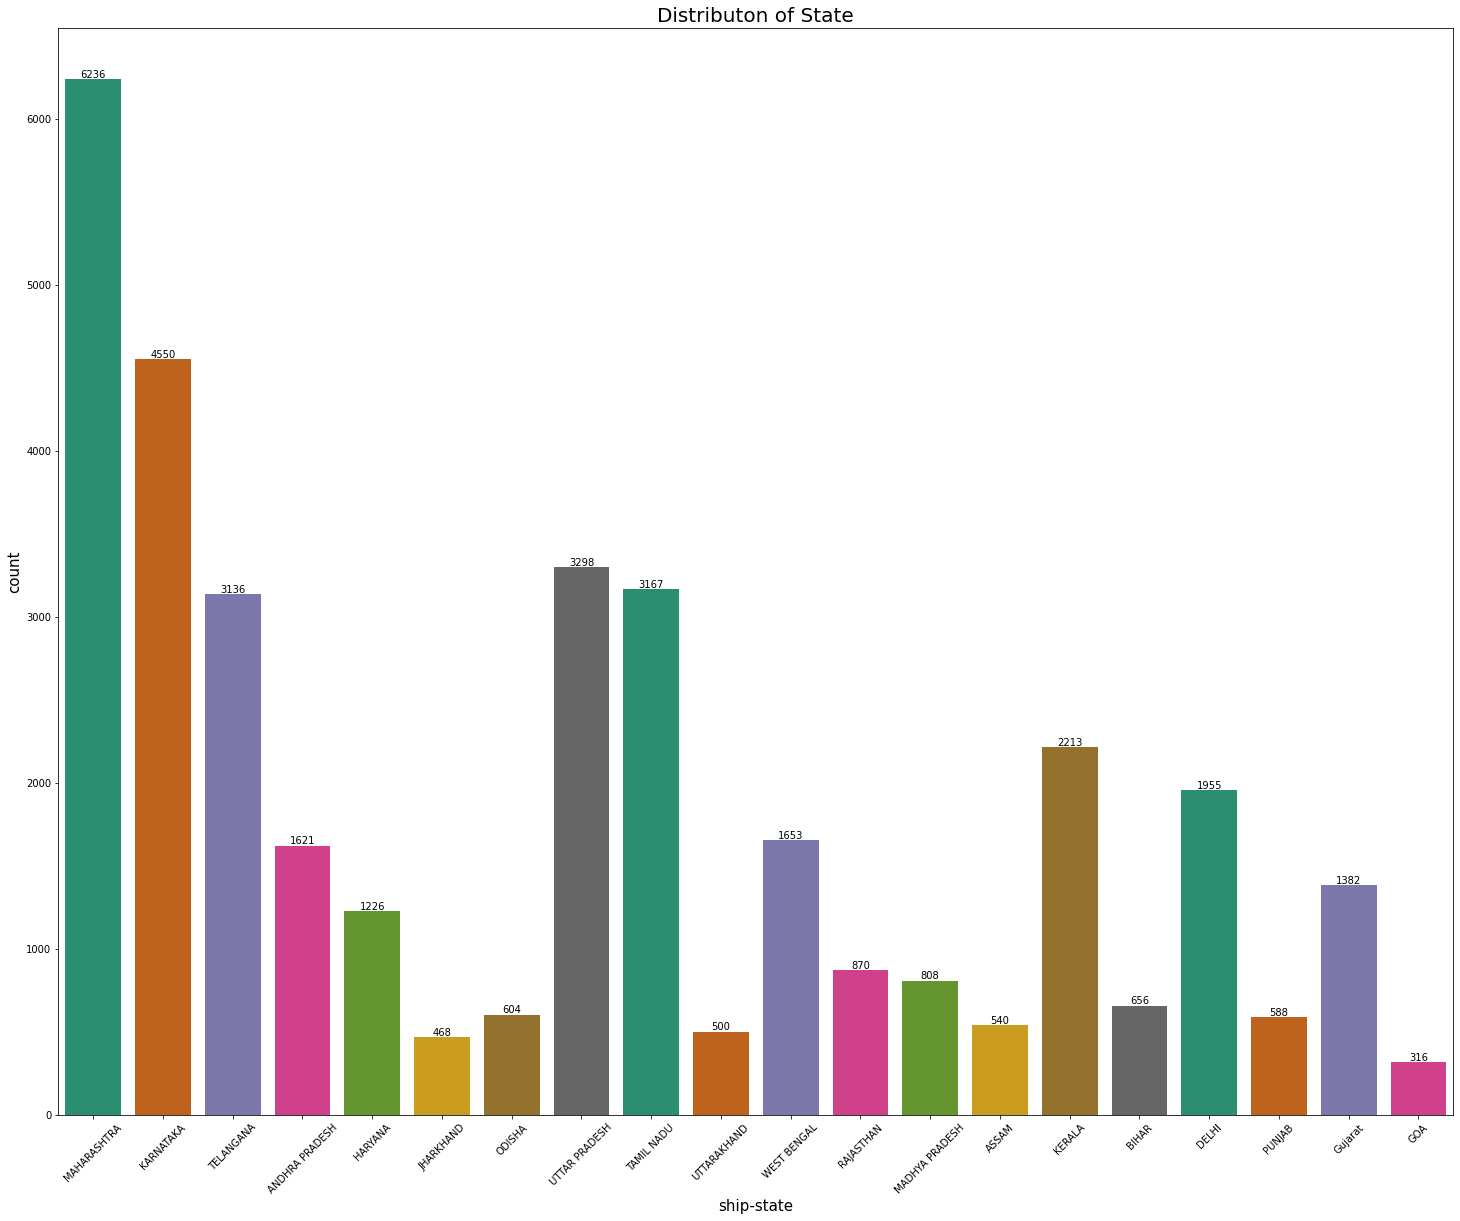

In [166]:
plt.figure(figsize=(25,20))
value_counts = df['ship-state'].value_counts().head(20)

a=sns.countplot(data=df[df['ship-state'].isin(value_counts.index)],x='ship-state',palette='Dark2')
for i in a.containers:
    a.bar_label(i)
plt.xlabel('ship-state',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('Distributon of State',fontsize=20)
plt.xticks(rotation=45)
plt.show()

### from above graph we can see that most of the buyers are from Maharashtra.

# Conclusion:


## The data analysis reveals that the business has a significant customer base in Maharashtra state, mainly serves retailers,fulfills orders through Amazon, experiences high demand for T-shirts in M-size.

In [3]:
df=pd.read_csv('Mall_Customers.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.shape

(200, 5)

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
data=df.iloc[:,[3,4]].values

In [14]:
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# choose no of cluster
we are using method within cluster sum of squares

In [15]:
# finding wcss value for different number of clusters

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)   # it is dividing data into no.of clusters
    kmeans.fit(data)    # it is fitting data into no. of cluster
    wcss.append(kmeans.inertia_)  # it is doing sum of squares of distance between data points  
wcss

[269981.28,
 183653.32894736843,
 106348.37306211122,
 73880.64496247195,
 44448.4554479337,
 40825.16946386947,
 33642.57922077923,
 26686.83778518779,
 24766.471609793443,
 23103.122085983916]

Text(0, 0.5, 'WCSS')

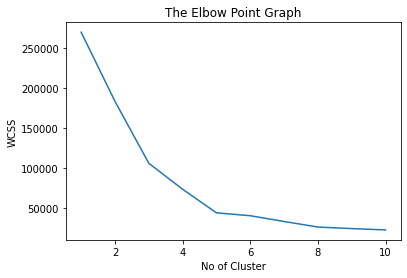

In [16]:
# plot elbo graph
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('No of Cluster')
plt.ylabel('WCSS')

## as we are able to see there are two elbow points 3,5. But 3 has high WCS compare to 5. So we are choosing 5 as a no of cluster
Training the k-means clustering model

In [17]:
kmeans = KMeans(n_clusters=5, random_state=0)   # it is dividing data into no of clusters

cluster=kmeans.fit_predict(data)                # it is fiting data n return the cluster no to data points
cluster 

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

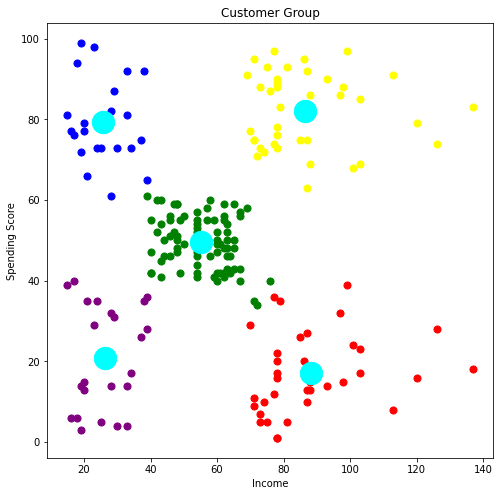

In [18]:
# visualizing all the clusters

plt.figure(figsize=(8,8))
# we are having 2 columns in data income, spending

plt.scatter(data[cluster==0,0],data[cluster==0,1], s=50,color='green')   # cluster==0,0 means row,col--- 
plt.scatter(data[cluster==1,0],data[cluster==1,1], s=50,color='yellow')  # cluster=1,0
plt.scatter(data[cluster==2,0],data[cluster==2,1], s=50,color='red')
plt.scatter(data[cluster==3,0],data[cluster==3,1], s=50,color='purple')
plt.scatter(data[cluster==4,0],data[cluster==4,1], s=50,color='blue')

plt.title('Customer Group')
plt.xlabel('Income')
plt.ylabel('Spending Score')

plt.scatter(kmeans.cluster_centers_[:, 0 ], kmeans.cluster_centers_[:,1],s=500,c='cyan')
plt.show()

# Conclusion  

###  Those who have low income there spending is also low, so gave them 50% discount. Those who have high income and low spending gve them 30% discount.